In [142]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

In [143]:
df = pd.read_csv('alignment-forum-posts-and-authors.csv')

Number of posts and unique authors

In [144]:
num_posts = len(df['titles'])
print(f'Number of posts: {num_posts}')

Number of posts: 435


In [145]:
unique_authors = []

for authors_list in df['authors']:
    authors = authors_list.split(',')
    for author in authors:
        author = author.lower().strip()
        unique_authors.append(author)

unique_authors = set(unique_authors)

print(f'Number of unique authors:', len(unique_authors))

Number of unique authors: 198


Number of authors by post count

In [146]:
from collections import defaultdict
author_counts = defaultdict(int)

for authors_list in df['authors']:
    authors = authors_list.split(',')
    for author in authors:
        author = author.lower().strip()
        # print(f'author: "{author}"')
        author_counts[author] += 1

for k, v in sorted(author_counts.items(), key=lambda item: item[1], reverse=True):
    print(f'{k}: {v}')

post_counts = defaultdict(int)

for author, count in author_counts.items():
    post_counts[count] += 1

print(post_counts)


johnswentworth: 32
dan hendrycks: 15
adam shimi: 15
evan hubinger: 14
steve byrnes: 12
adam jermyn: 11
thomasw: 10
stuart armstrong: 10
leogao: 9
marius hobbhahn: 9
alex turner: 8
richard ngo: 8
diffractor: 7
vivek hebbar: 7
andrew critch: 7
nate soares: 6
ethan perez: 6
paul bricman: 6
danielfilan: 6
neel nanda: 6
sam bowman: 6
buck shlegeris: 6
oliver sourbut: 6
eliezer yudkowsky: 6
andreas stuhlmüller: 5
daniel kokotajlo: 5
themcdouglas: 5
avery: 5
lucius bushnaq: 5
donald hobson: 5
oliver zhang: 5
nostalgebraist: 5
rohin shah: 5
jan hendrik kirchner: 5
logan riggs smith: 5
abram demski: 4
zeshen: 4
luke h miles: 4
tamsin leake: 4
quintin pope: 4
beth barnes: 4
david scott krueger: 4
spencer becker-kahn: 4
jacob hilton: 4
thane ruthenis: 4
nick hay: 4
tamay besiroglu: 4
ramana kumar: 4
victoria krakovna: 4
cullen_okeefe: 4
ian mckenzie: 3
connor leahy: 3
holdenkarnofsky: 3
nora_ammann: 3
jesseclifton: 3
samuel dylan martin: 3
anthony digiovanni: 3
charlie steiner: 3
jungofthewon: 3


authors with 32 posts published: 1
authors with 15 posts published: 2
authors with 14 posts published: 1
authors with 12 posts published: 1
authors with 11 posts published: 1
authors with 10 posts published: 2
authors with 9 posts published: 2
authors with 8 posts published: 2
authors with 7 posts published: 3
authors with 6 posts published: 9
authors with 5 posts published: 11
authors with 4 posts published: 15
authors with 3 posts published: 18
authors with 2 posts published: 40
authors with 1 posts published: 90
popt: [2.32758051]
total_posts: 214.18478382094895


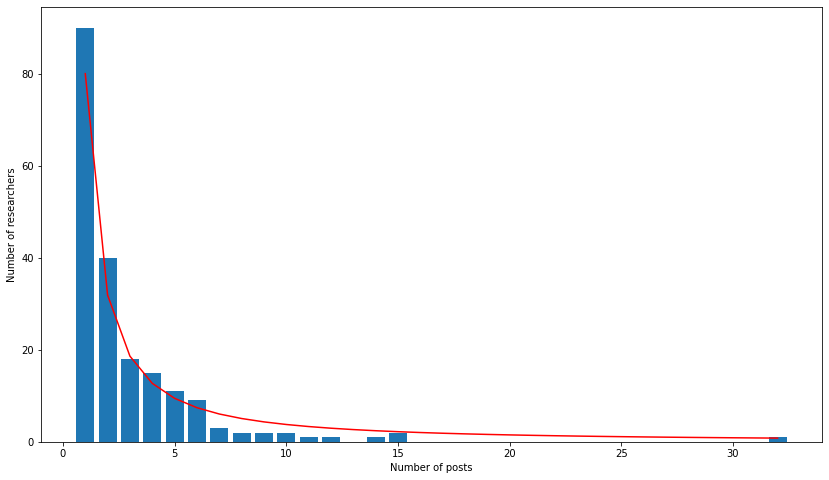

In [147]:
fig, ax = plt.subplots(figsize=(14, 8))

num_posts = [n for n in range(1, max(post_counts.keys()) + 1)]
counts = [post_counts[n] if n in post_counts else 0 for n in num_posts]

for k, v in sorted(post_counts.items(), key=lambda x: x[0], reverse=True):
    print(f'authors with {k} posts published: {v}')

ax.set_xlabel('Number of posts')
ax.set_ylabel('Number of researchers')
ax.bar(num_posts, counts)

# Lotka's Law model:
c = 80

xdata = np.arange(1, 33)

def f(x, e):
    return (80 / xdata**e) * xdata

popt, _ = curve_fit(f, xdata, counts)
print('popt:', popt)

ax.plot(xdata, f(xdata, *popt), 'r')

total_posts = f(xdata, *popt).sum()
print(f'total_posts: {total_posts}')


Text(80, 10, 'Two or more posts')

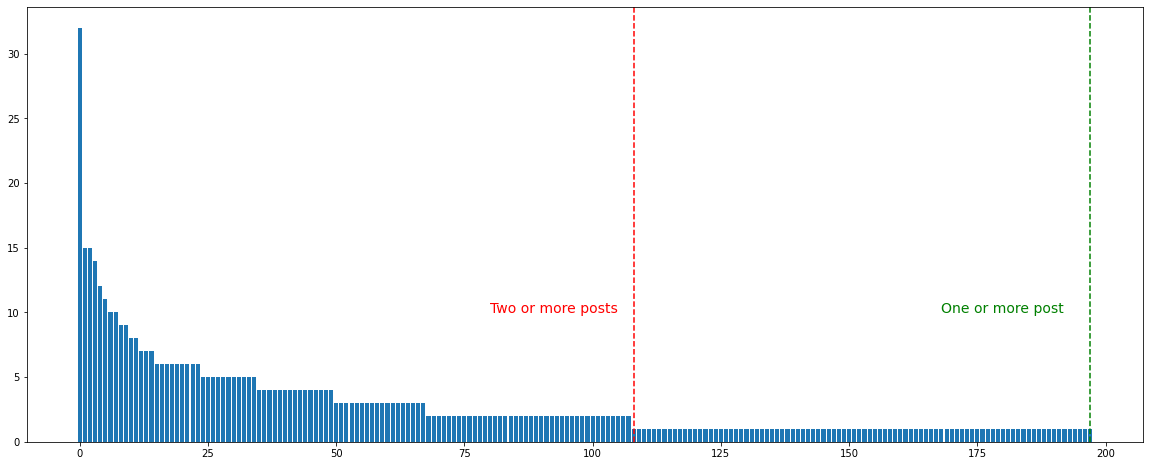

In [148]:
# plot researchers on the x-axis and number of posts on the y-axis

fig, ax = plt.subplots(figsize=(20, 8))

author_counts_sorted = sorted(author_counts.items(), key=lambda item: item[1], reverse=True)

names = [t[0] for t in author_counts_sorted]
post_counts = [t[1] for t in author_counts_sorted]

# ax.bar(names[:10], post_counts[:10])

ax.bar([i for i in range(len(names))], post_counts)
# ax.set_xticks([])

ax.axvline(x=197, color='green', linestyle='--')
ax.text(168, 10, 'One or more post', color='green', fontsize=14)

ax.axvline(x=108, color='red', linestyle='--')
ax.text(80, 10, 'Two or more posts', color='red', fontsize=14)


In [149]:
num_posts = len(df['titles'])
print(f'num posts: {num_posts}')

for n in range(1, 7):
    num_researchers = num_posts // n
    print(f'num_researchers given: {n} posts per researcher: {num_researchers}')


num posts: 435
num_researchers given: 1 posts per researcher: 435
num_researchers given: 2 posts per researcher: 217
num_researchers given: 3 posts per researcher: 145
num_researchers given: 4 posts per researcher: 108
num_researchers given: 5 posts per researcher: 87
num_researchers given: 6 posts per researcher: 72


In [150]:
# for k, v in sorted(author_counts.items(), key=lambda item: item[1], reverse=True):
    # print(f'{k}: {v}')

names = [t[0] for t in author_counts_sorted]
post_counts = [t[1] for t in author_counts_sorted]

df = pd.DataFrame({
    'authors': names, 
    'counts': post_counts
})

df.to_csv('alignment-forum-ai-authors.csv')
